**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

# Intro to Random Forests

## About this course

### Teaching approach

This course is being taught by Jeremy Howard, and was developed by Jeremy along with Rachel Thomas. Rachel has been dealing with a life-threatening illness so will not be teaching as originally planned this year.

Jeremy has worked in a number of different areas - feel free to ask about anything that he might be able to help you with at any time, even if not directly related to the current topic:

- Management consultant (McKinsey; AT Kearney)
- Self-funded startup entrepreneur (Fastmail: first consumer synchronized email; Optimal Decisions: first optimized insurance pricing)
- VC-funded startup entrepreneur: (Kaggle; Enlitic: first deep-learning medical company)

I'll be using a *top-down* teaching method, which is different from how most math courses operate.  Typically, in a *bottom-up* approach, you first learn all the separate components you will be using, and then you gradually build them up into more complex structures.  The problems with this are that students often lose motivation, don't have a sense of the "big picture", and don't know what they'll need.

If you took the fast.ai deep learning course, that is what we used.  You can hear more about my teaching philosophy [in this blog post](http://www.fast.ai/2016/10/08/teaching-philosophy/) or [in this talk](https://vimeo.com/214233053).

Harvard Professor David Perkins has a book, [Making Learning Whole](https://www.amazon.com/Making-Learning-Whole-Principles-Transform/dp/0470633719) in which he uses baseball as an analogy.  We don't require kids to memorize all the rules of baseball and understand all the technical details before we let them play the game.  Rather, they start playing with a just general sense of it, and then gradually learn more rules/details as time goes on.

All that to say, don't worry if you don't understand everything at first!  You're not supposed to.  We will start using some "black boxes" such as random forests that haven't yet been explained in detail, and then we'll dig into the lower level details later.

To start, focus on what things DO, not what they ARE.

### Your practice

People learn by:
1. **doing** (coding and building)
2. **explaining** what they've learned (by writing or helping others)

Therefore, we suggest that you practice these skills on Kaggle by:
1. Entering competitions (*doing*)
2. Creating Kaggle kernels (*explaining*)

It's OK if you don't get good competition ranks or any kernel votes at first - that's totally normal! Just try to keep improving every day, and you'll see the results over time.

To get better at technical writing, study the top ranked Kaggle kernels from past competitions, and read posts from well-regarded technical bloggers. Some good role models include:

- [Peter Norvig](http://nbviewer.jupyter.org/url/norvig.com/ipython/ProbabilityParadox.ipynb) (more [here](http://norvig.com/ipython/))
- [Stephen Merity](https://smerity.com/articles/2017/deepcoder_and_ai_hype.html)
- [Julia Evans](https://codewords.recurse.com/issues/five/why-do-neural-networks-think-a-panda-is-a-vulture) (more [here](https://jvns.ca/blog/2014/08/12/what-happens-if-you-write-a-tcp-stack-in-python/))
- [Julia Ferraioli](http://blog.juliaferraioli.com/2016/02/exploring-world-using-vision-twilio.html)
- [Edwin Chen](http://blog.echen.me/2014/10/07/moving-beyond-ctr-better-recommendations-through-human-evaluation/)
- [Slav Ivanov](https://blog.slavv.com/picking-an-optimizer-for-style-transfer-86e7b8cba84b) (fast.ai student)
- [Brad Kenstler](https://hackernoon.com/non-artistic-style-transfer-or-how-to-draw-kanye-using-captain-picards-face-c4a50256b814) (fast.ai and USF MSAN student)

### Books

The more familiarity you have with numeric programming in Python, the better. If you're looking to improve in this area, we strongly suggest Wes McKinney's [Python for Data Analysis, 2nd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=asap_bc?ie=UTF8).

For machine learning with Python, we recommend:

- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Andreas-Mueller/dp/1449369413): From one of the scikit-learn authors, which is the main library we'll be using
- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, 2nd Edition](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=dp_ob_title_bk): New version of a very successful book. A lot of the new material however covers deep learning in Tensorflow, which isn't relevant to this course
- [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=MBV2QMFH3EZ6B3YBY40K)


### Syllabus in brief

Depending on time and class interests, we'll cover something like (not necessarily in this order):

- Train vs test
  - Effective validation set construction
- Trees and ensembles
  - Creating random forests
  - Interpreting random forests
- What is ML?  Why do we use it?
  - What makes a good ML project?
  - Structured vs unstructured data
  - Examples of failures/mistakes
- Feature engineering
  - Domain specific - dates, URLs, text
  - Embeddings / latent factors
- Regularized models trained with SGD
  - GLMs, Elasticnet, etc (NB: see what James covered)
- Basic neural nets
  - PyTorch
  - Broadcasting, Matrix Multiplication
  - Training loop, backpropagation
- KNN
- CV / bootstrap (Diabetes data set?)
- Ethical considerations

Skip:

- Dimensionality reduction
- Interactions
- Monitoring training
- Collaborative filtering
- Momentum and LR annealing


## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "data/bulldozers/"

In [4]:
!ls {PATH}

Train.csv


# Introduction to *Blue Book for Bulldozers*

## About...

### ...our teaching

At fast.ai we have a distinctive [teaching philosophy](http://www.fast.ai/2016/10/08/teaching-philosophy/) of ["the whole game"](https://www.amazon.com/Making-Learning-Whole-Principles-Transform/dp/0470633719/ref=sr_1_1?ie=UTF8&qid=1505094653).  This is different from how most traditional math & technical courses are taught, where you have to learn all the individual elements before you can combine them (Harvard professor David Perkins call this *elementitis*), but it is similar to how topics like *driving* and *baseball* are taught.  That is, you can start driving without [knowing how an internal combustion engine works](https://medium.com/towards-data-science/thoughts-after-taking-the-deeplearning-ai-courses-8568f132153), and children begin playing baseball before they learn all the formal rules.

### ...our approach to machine learning

Most machine learning courses will throw at you dozens of different algorithms, with a brief technical description of the math behind them, and maybe a toy example. You're left confused by the enormous range of techniques shown and have little practical understanding of how to apply them.

The good news is that modern machine learning can be distilled down to a couple of key techniques that are of very wide applicability. **Recent studies have shown that the vast majority of datasets can be best modeled with just two methods**:

- *Ensembles of decision trees* (i.e. Random Forests and Gradient Boosting Machines), mainly for structured data (such as you might find in a database table at most companies)
- *Multi-layered neural networks learnt with SGD* (i.e. shallow and/or deep learning), mainly for unstructured data (such as audio, vision, and natural language)

In this course we'll be doing a deep dive into random forests, and simple models learnt with SGD. You'll be learning about gradient boosting and deep learning in part 2.

### ...this dataset

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

### ...Kaggle Competitions

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.

## The data

### Look at the data

Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

*Question*

What stands out to you from the above description?  What needs to be true of our training and validation sets?

In [6]:
%time df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])

print(df_raw.shape)
df_raw.columns

CPU times: user 2min 5s, sys: 864 ms, total: 2min 6s
Wall time: 2min 6s
(401125, 53)


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
display_all(df_raw.tail())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,6333342,7750,1926965,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [9]:
display_all(df_raw.describe(include='all'))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3919,4999,1950,175,122,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2009-02-16 00:00:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33985,1932,5039,19798,43235,13202,15875,62274,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
display_all(df_raw.dtypes)

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [11]:
df_raw.SalePrice = np.log(df_raw.SalePrice) # replace sales price with it's log

In [12]:
print(df_raw.shape)
df_raw.SalePrice.dtypes

(401125, 53)


dtype('float64')

### Initial processing

In [13]:
try:
    m = RandomForestRegressor(n_jobs=-1) # sklearn module  
    # The following code is supposed to fail due to string values in the input data
    m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)
except Exception as error:
    print(error)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


could not convert string to float: 'Low'


This dataset contains a mix of **continuous** and **categorical** variables. Random Forests require all variables to be numbers.

The following method **extracts particular date fields from a complete datetime for the purpose of constructing categoricals**.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [14]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [15]:
print(df_raw.shape)
df_raw.columns # added a series of datetime columns

(401125, 65)


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


An additional 12 date related columns have been added, such as `saleDay`, `saleWeek`, `saleMonth`, `saleYear`, `saleDayofweek`, `saleDayofyear`, etc.

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [16]:
# Change any columns of strings in a panda's dataframe to a column 
# of categorical values.
train_cats(df_raw)

In [17]:
print(df_raw.shape)
df_raw.head()

(401125, 65)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [18]:
df_raw.dtypes.unique()

array([dtype('int64'), dtype('float64'),
       CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=True),
       CategoricalDtype(categories=['100C', '104', '1066', '1066E', '1080', '1080B', '1088',
                  '1088CK', '1088LT', '1088TTL',
                  ...
                  'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80',
                  'ZX800', 'ZX800LC', 'ZX80LCK', 'ZX850H'],
                 ordered=True),
       CategoricalDtype(categories=['10', '100', '104', '1066', '1080', '1088', '10DG', '11',
                  '110', '1105',
                  ...
                  'ZX370', 'ZX450', 'ZX460', 'ZX50', 'ZX600', 'ZX70', 'ZX75',
                  'ZX80', 'ZX800', 'ZX850'],
                 ordered=True),
       CategoricalDtype(categories=[' MSR SPIN ACE', '#NAME?', '-2', '-3', '-5', '-5L', '-6',
                  '-7', '0.7', '1',
                  ...
                  'XP', 'XT', 'Z', 'ZF', 'ZHS', 'ZHS G', 'ZT', 'ZTM', 'ZTS',
                  '

We can specify the order to use for categorical variables if we wish:

In [19]:
df_raw.UsageBand.unique()

[Low, High, Medium, NaN]
Categories (3, object): [High < Low < Medium]

Codes associated with each category.

In [20]:
df_raw.UsageBand.cat.codes.unique()

array([ 1,  0,  2, -1])

In [21]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

Set the correct order for the categories.

In [22]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [23]:
df_raw.UsageBand.unique()

[Low, High, Medium, NaN]
Categories (3, object): [High < Medium < Low]

In [24]:
df_raw.UsageBand.cat.codes.unique() # 0 == high, 1 == medium, 2 == low

array([ 2,  0,  1, -1])

In [25]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [26]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [27]:
df_raw.UsageBand.unique()

array([ 2,  0,  1, -1])

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [28]:
# percentage of missing values
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [ ]:
######### KILLS THE KERNEL EVERY TIME ################
try:
    os.makedirs('tmp', exist_ok=True)
    df_raw.to_feather('./tmp/bulldozers-raw')
except Exception as e:
    print(f'Error saving data to disc, {e}')

Output the work so far to csv, since can't read/write to feather format.

In [29]:
df_raw.to_csv('./data/df_raw.csv')

### Pre-processing

In the future we can simply read it from this fast format.

In [33]:
try:
    df_raw = pd.read_feather('tmp/bulldozers-raw')
except Exception as e:
    print(f'Could not read file: {e}')

Could not read file: File is too small to be a well-formed file


We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable using the `proc_df` function (part of fast ai library).

By default pandas replaces categorical variables with `NaN`,  with `-1`, `proc_df` adds `1` to every value.

For numerical columns with `NaN` values we add an additional column with the column's name appended with `_na`, and assign a value of `1` if the value is missing or `0` otherwise. We replace the `NaN` value with the median of the column.

In [35]:
# split dataset into training and label (we want to predict the sales price)
df, y, nas = proc_df(df_raw, 'SalePrice') 

print(df.shape) # dataframe minus 'SalePrice'
print(y.shape) # 'SalePrice' column
print(type(nas))
print(nas)
display_all(df.tail())

(401125, 66)
(401125,)
<class 'dict'>
{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
401120,6333336,1840702,21439,149,1.0,2005,0.0,-1,657,207,106,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000,False,True
401121,6333337,1830472,21439,149,1.0,2005,0.0,-1,657,207,106,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000,False,True
401122,6333338,1887659,21439,149,1.0,2005,0.0,-1,657,207,106,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000,False,True
401123,6333341,1903570,21435,149,2.0,2005,0.0,-1,483,159,106,0,0,5,13,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800,False,True
401124,6333342,1926965,21435,149,2.0,2005,0.0,-1,483,159,106,0,0,5,13,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800,False,True


In [36]:
display_all(df.dtypes)

SalesID                          int64
MachineID                        int64
ModelID                          int64
datasource                       int64
auctioneerID                   float64
YearMade                         int64
MachineHoursCurrentMeter       float64
UsageBand                         int8
fiModelDesc                      int16
fiBaseModel                      int16
fiSecondaryDesc                  int16
fiModelSeries                     int8
fiModelDescriptor                int16
ProductSize                       int8
fiProductClassDesc                int8
state                             int8
ProductGroup                      int8
ProductGroupDesc                  int8
Drive_System                      int8
Enclosure                         int8
Forks                             int8
Pad_Type                          int8
Ride_Control                      int8
Stick                             int8
Transmission                      int8
Turbocharged             

We now have something we can pass to a random forest!

In [37]:
m = RandomForestRegressor(n_jobs=-1) # create a separate job for each cpu
m.fit(df, y)
m.score(df,y)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9826441951229976

In statistics, the **coefficient of determination**, denoted R2 or r2 and pronounced **"R squared"**, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an R^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="images/overfitting2.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [38]:
# split the training set into training and validaton
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df) - n_valid

raw_train, raw_valid = split_vals(df_raw, n_trn)

X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

The RMSE (Root Mean Square Error) is a measure of the differences between the values predicted by a model or estimator and the observed values. Values are always less than `1`, a value of `0` (almost never achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSE is better than a higher one. A negative value means that your model is worse than simply picking the means for predictions.

In [39]:
# pass in 2 * 1D arrays
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean()) 

def print_score(m):
    res = [
        rmse(m.predict(X_train), y_train), 
        rmse(m.predict(X_valid), y_valid),
        m.score(X_train, y_train), 
        m.score(X_valid, y_valid)
    ]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [40]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2min 5s, sys: 861 ms, total: 2min 6s
Wall time: 42.1 s
[0.00908053543193781, 0.025239261675904873, 0.982374361672824, 0.8845180585984204]


An R^2 in the high-80's isn't bad at all (and the RMSE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Speeding things up

In [41]:
# create a random subset of 30,000, then sample the first 20,000 from those
# nas - dict of which numerical cols had missing values, and their median value
# pass in the dict to ensure the same medians are used if req'd
# the dict will be updated if the dataset has additional columns with missing values
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [42]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 4.14 s, sys: 15.4 ms, total: 4.16 s
Wall time: 1.49 s
[0.010893371694157845, 0.038339641445049345, 0.9734240851452681, 0.7335247504080129]


## Single tree

In [61]:
# estimator == tree, max_depth of 3 == small tree, bootstrap False disables randomness,
# making it a deterministic tree
m = RandomForestRegressor(
    n_estimators=1, 
    max_depth=3, 
    bootstrap=False, 
    n_jobs=-1
)
m.fit(X_train, y_train)
print_score(m)

[0.052731355723315776, 0.05591323932180611, 0.40562598586523513, 0.4332518761324432]


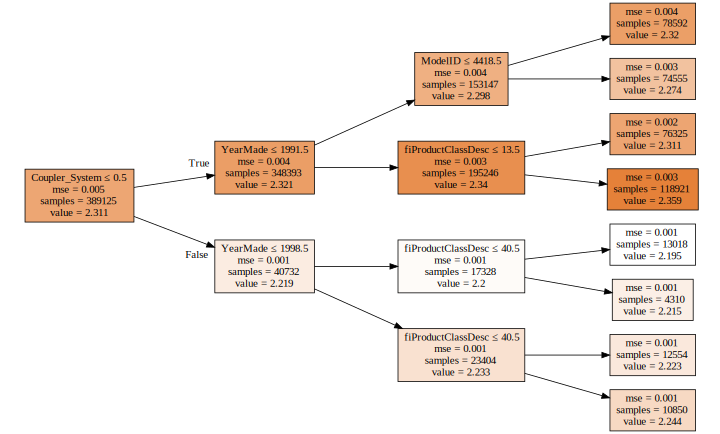

In [62]:
draw_tree(m.estimators_[0], df_trn, precision=3);

Let's see what happens if we create a bigger tree.

In [45]:
# single tree, removing 'max_depth' means each leaf node will contain 1 element, R^2 becomes 1
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.7732707845720615e-05, 0.048143506481798465, 0.9999999295771338, 0.5798191835667681]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use **bagging** of multiple trees to get more generalizable results.

When there is no limit to the number of splits, `max_depth`, splitting carries on until the leaf nodes have one sample - giving an `R^2` of `1`.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [46]:
m = RandomForestRegressor(n_jobs=-1) # by default creates 10 estimators/trees
m.fit(X_train, y_train)
print_score(m)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.011036888163344923, 0.03696450959582603, 0.9727192150303822, 0.7522973337561699]


We'll grab the predictions for each individual tree, and look at one example.

In [47]:
# make a prediction with each tree in turn and then concatenate the results using np.stack
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
# results from 10 trees, mean, actual prediction
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([2.25988, 2.26681, 2.2701 , 2.23062, 2.23993, 2.23993, 2.21474, 2.20252, 2.22033, 2.22033]),
 2.236518512868334,
 2.2088215008013257)

The mean of the 10 trees is `2.365`, while the actual value is `2.2088`.

In [48]:
preds.shape

(10, 12000)

Predictions of 10 trees, 12000 validation set.

**Plot R^2 to determine the optimum number of trees**.

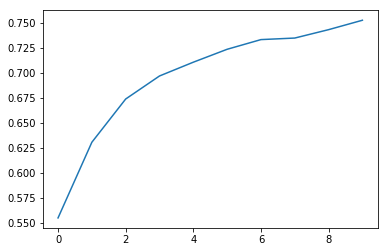

In [49]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [50]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.010065397274964126, 0.03686015248843981, 0.9773104741456232, 0.7536939731383628]


In [51]:
# make a prediction with each tree in turn and then concatenate the results using np.stack
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
# results from 10 trees, mean, actual prediction
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([2.20252, 2.21474, 2.1958 , 2.23993, 2.20882, 2.1958 , 2.20882, 2.20882, 2.1958 , 2.1958 , 2.1958 ,
        2.27634, 2.28219, 2.23993, 2.22283, 2.23993, 2.22033, 2.23062, 2.26681, 2.1958 ]),
 2.2218721597014426,
 2.2088215008013257)

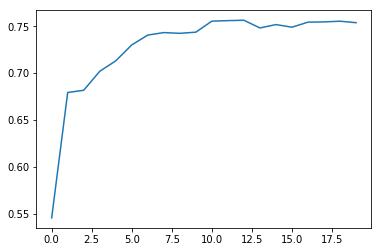

In [52]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [53]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.009513999143165927, 0.03587830664413919, 0.9797283175437996, 0.7666409444835226]


In [54]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.009244080885984607, 0.035757286832180435, 0.9808622422663542, 0.7682125593222857]


In [55]:
# make a prediction with each tree in turn and then concatenate the results using np.stack
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
# results from 10 trees, mean, actual prediction
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([2.23062, 2.23993, 2.23993, 2.22561, 2.20252, 2.21474, 2.25988, 2.23993, 2.22033, 2.23062, 2.23062,
        2.21474, 2.23993, 2.22033, 2.23993, 2.23993, 2.23062, 2.23993, 2.1958 , 2.24427, 2.22247, 2.23062,
        2.23062, 2.20882, 2.20882, 2.20252, 2.22033, 2.23993, 2.21474, 2.23768, 2.20882, 2.22033, 2.20882,
        2.23993, 2.23062, 2.25988, 2.21474, 2.20882, 2.23539, 2.23062, 2.21474, 2.23062, 2.23768, 2.23993,
        2.21474, 2.23993, 2.20882, 2.3263 , 2.1958 , 2.22247, 2.1958 , 2.23993, 2.23062, 2.24841, 2.23062,
        2.1958 , 2.25239, 2.20882, 2.22247, 2.21474, 2.22561, 2.23993, 2.26681, 2.23993, 2.25621, 2.1958 ,
        2.223  , 2.1958 , 2.2701 , 2.21474, 2.21474, 2.23993, 2.3263 , 2.23993, 2.22247, 2.23768, 2.23062,
        2.2701 , 2.21474, 2.1958 ]), 2.229570661059274, 2.2088215008013257)

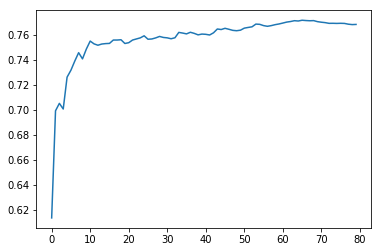

In [56]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(80)]);

### Out-of-bag (OOB) score

**Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both?** With the existing information we've shown, we can't tell. However, random forests have a very clever trick called **out-of-bag (OOB) error** which can handle this (and more!).

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was **not** included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [57]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.009561868755050135, 0.035846645901854594, 0.9795238107258663, 0.7670526172575465, 0.8558794766591288]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: **subsampling**. Let's **return to using our full dataset**, so that we can demonstrate the impact of this technique.

In [60]:
# split the full dataset once more
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a **different random subset per tree**. That way, given enough trees, the model can still see **all** the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [63]:
# fastai function, set each tree to select a random sample of 20,000 from the full dataset
set_rf_samples(20000)

In [69]:
# can't use 'oob_score' with 'set_rf_samples' - they are incompatble
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/theboymo/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 13.7 s, sys: 548 ms, total: 14.3 s
Wall time: 7.61 s
[0.024000267820002405, 0.027830904959864653, 0.8768727681790324, 0.859584374112291]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [70]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.022643691822522682, 0.0264435682305591, 0.890398522013455, 0.8732345511670145]


### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [71]:
reset_rf_samples() # get back to full dataset

Let's get a baseline for this full set to compare to.

In [72]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [73]:
# train on the full dataset
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8min 1s, sys: 3.53 s, total: 8min 4s
Wall time: 2min 23s
[0.007868478307304996, 0.024536244429736537, 0.9867656247895945, 0.8908617558334198, 0.9058030582065997]


In [74]:
t=m.estimators_[0].tree_

In [75]:
dectree_max_depth(t)

47

In [76]:
m = RandomForestRegressor(
    n_estimators=40, 
    min_samples_leaf=5, 
    n_jobs=-1, 
    oob_score=True
)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 49s, sys: 2.54 s, total: 6min 51s
Wall time: 1min 59s
[0.014093504508872125, 0.023549466201912266, 0.9575419604672523, 0.89946369527898, 0.9044911780576165]


In [77]:
t=m.estimators_[0].tree_

In [78]:
dectree_max_depth(t)

37

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [79]:
m = RandomForestRegressor(
    n_estimators=40, 
    min_samples_leaf=3, 
    n_jobs=-1, 
    oob_score=True
)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7min 5s, sys: 2.99 s, total: 7min 8s
Wall time: 2min 5s
[0.01152844298067298, 0.023776769559771246, 0.9715905221728117, 0.8975135426718127, 0.90591783078508]


We can also **increase the amount of variation amongst the trees** by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

- 1, 3, 5, 10, 25, 100

In [80]:
m = RandomForestRegressor(
    n_estimators=40, 
    min_samples_leaf=3, 
    max_features=0.5, 
    n_jobs=-1, 
    oob_score=True
 )
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 50s, sys: 2.33 s, total: 3min 52s
Wall time: 1min 11s
[0.011930536363045382, 0.022958866935814035, 0.9695742090438557, 0.9044431806548704, 0.9093758627752208]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different `max_features` methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:
![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)